In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc


In [2]:
midi_path = '../data/MIDI-Freestyle/Freestyle_1041.mid'

In [3]:
mf = m2.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()
   

In [4]:
ev = mf.tracks[0].events


In [5]:
df = pd.DataFrame(data=[e.__dict__ for e in ev])
df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
df.insert(4,'time_abs',df.time.cumsum())
df

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
0,<music21.midi.MidiTrack 0 -- 7056 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
1,<music21.midi.MidiTrack 0 -- 7056 events>,MetaEvents.SEQUENCE_TRACK_NAME,SEQUENCE_TRACK_NAME,0,0,NaN,b'7 2-Marimba1 Classic\x00',NaN,None,None,255.0
2,<music21.midi.MidiTrack 0 -- 7056 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
3,<music21.midi.MidiTrack 0 -- 7056 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
4,<music21.midi.MidiTrack 0 -- 7056 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7051,<music21.midi.MidiTrack 0 -- 7056 events>,ChannelVoiceMessages.NOTE_ON,NOTE_ON,0,31655,1.0,43,77.0,None,None,144.0
7052,<music21.midi.MidiTrack 0 -- 7056 events>,DeltaTime,DeltaTime,13,31668,NaN,None,NaN,None,None,NaN
7053,<music21.midi.MidiTrack 0 -- 7056 events>,ChannelVoiceMessages.NOTE_OFF,NOTE_OFF,0,31668,1.0,43,64.0,None,None,128.0
7054,<music21.midi.MidiTrack 0 -- 7056 events>,DeltaTime,DeltaTime,0,31668,NaN,None,NaN,None,None,NaN


In [6]:
all_events = {}
open_events = {}
for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
    if row.type_str=='NOTE_ON':
        open_events[row.parameter1]=row.time_abs
    else:
        all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


all_events;
    

In [7]:
event_queue = []
counters = [0]*3

keys = list(all_events.keys())
values = [[v[0] for v in val] for val in all_events.values()]

active = 3

lens = [len(v) for v in values]
while active:
    next_event_key = np.argmin([v[i] if i<len(v) else np.inf for v,i in zip(values,counters)])
    rec = (values[next_event_key][counters[next_event_key]],keys[next_event_key],counters.copy()) 
    print(counters,next_event_key,[v[i] for v,i in zip(values,counters)], rec)
    counters[next_event_key] += 1
    event_queue.append(rec)
    
    #print(' 1'[counters[next_event_key]==lens[next_event_key]],end='')
    active -= (counters[next_event_key]==lens[next_event_key])
    #if counters.max()==10: break

[0, 0, 0] 0 [240, 335, 352] (240, 43, [0, 0, 0])
[1, 0, 0] 1 [339, 335, 352] (335, 45, [1, 0, 0])
[1, 1, 0] 0 [339, 507, 352] (339, 43, [1, 1, 0])
[2, 1, 0] 0 [348, 507, 352] (348, 43, [2, 1, 0])
[3, 1, 0] 2 [421, 507, 352] (352, 48, [3, 1, 0])
[3, 1, 1] 0 [421, 507, 690] (421, 43, [3, 1, 1])
[4, 1, 1] 0 [428, 507, 690] (428, 43, [4, 1, 1])
[5, 1, 1] 1 [523, 507, 690] (507, 45, [5, 1, 1])
[5, 2, 1] 0 [523, 542, 690] (523, 43, [5, 2, 1])
[6, 2, 1] 0 [533, 542, 690] (533, 43, [6, 2, 1])
[7, 2, 1] 1 [604, 542, 690] (542, 45, [7, 2, 1])
[7, 3, 1] 1 [604, 577, 690] (577, 45, [7, 3, 1])
[7, 4, 1] 0 [604, 621, 690] (604, 43, [7, 4, 1])
[8, 4, 1] 0 [613, 621, 690] (613, 43, [8, 4, 1])
[9, 4, 1] 1 [673, 621, 690] (621, 45, [9, 4, 1])
[9, 5, 1] 0 [673, 1117, 690] (673, 43, [9, 5, 1])
[10, 5, 1] 0 [681, 1117, 690] (681, 43, [10, 5, 1])
[11, 5, 1] 2 [744, 1117, 690] (690, 48, [11, 5, 1])
[11, 5, 2] 0 [744, 1117, 759] (744, 43, [11, 5, 2])
[12, 5, 2] 0 [752, 1117, 759] (752, 43, [12, 5, 2])
[13, 5,

[303, 240, 284] 0 [15260, 15298, 15262] (15260, 43, [303, 240, 284])
[304, 240, 284] 2 [15319, 15298, 15262] (15262, 48, [304, 240, 284])
[304, 240, 285] 1 [15319, 15298, 15346] (15298, 45, [304, 240, 285])
[304, 241, 285] 1 [15319, 15307, 15346] (15307, 45, [304, 241, 285])
[304, 242, 285] 0 [15319, 15368, 15346] (15319, 43, [304, 242, 285])
[305, 242, 285] 2 [15371, 15368, 15346] (15346, 48, [305, 242, 285])
[305, 242, 286] 1 [15371, 15368, 15440] (15368, 45, [305, 242, 286])
[305, 243, 286] 0 [15371, 15372, 15440] (15371, 43, [305, 243, 286])
[306, 243, 286] 1 [15380, 15372, 15440] (15372, 45, [306, 243, 286])
[306, 244, 286] 0 [15380, 15443, 15440] (15380, 43, [306, 244, 286])
[307, 244, 286] 0 [15423, 15443, 15440] (15423, 43, [307, 244, 286])
[308, 244, 286] 2 [15467, 15443, 15440] (15440, 48, [308, 244, 286])
[308, 244, 287] 1 [15467, 15443, 15540] (15443, 45, [308, 244, 287])
[308, 245, 287] 0 [15467, 15514, 15540] (15467, 43, [308, 245, 287])
[309, 245, 287] 0 [15496, 15514, 1

[584, 509, 572] 1 [29396, 29395, 29407] (29395, 45, [584, 509, 572])
[584, 510, 572] 0 [29396, 29429, 29407] (29396, 43, [584, 510, 572])
[585, 510, 572] 0 [29400, 29429, 29407] (29400, 43, [585, 510, 572])
[586, 510, 572] 2 [29486, 29429, 29407] (29407, 48, [586, 510, 572])
[586, 510, 573] 1 [29486, 29429, 29433] (29429, 45, [586, 510, 573])
[586, 511, 573] 2 [29486, 29490, 29433] (29433, 48, [586, 511, 573])
[586, 511, 574] 2 [29486, 29490, 29483] (29483, 48, [586, 511, 574])
[586, 511, 575] 0 [29486, 29490, 29545] (29486, 43, [586, 511, 575])
[587, 511, 575] 1 [29582, 29490, 29545] (29490, 45, [587, 511, 575])
[587, 512, 575] 1 [29582, 29510, 29545] (29510, 45, [587, 512, 575])
[587, 513, 575] 1 [29582, 29537, 29545] (29537, 45, [587, 513, 575])
[587, 514, 575] 2 [29582, 29599, 29545] (29545, 48, [587, 514, 575])
[587, 514, 576] 0 [29582, 29599, 29595] (29582, 43, [587, 514, 576])
[588, 514, 576] 2 [29611, 29599, 29595] (29595, 48, [588, 514, 576])
[588, 514, 577] 1 [29611, 29599, 2

IndexError: list index out of range

In [ ]:
print(values[0][:10])
print(values[1][:10])
print(values[2][:10])

In [8]:
x= [x[0] for x in event_queue]
y = np.vstack([x[2] for x in event_queue])
y

array([[  0,   0,   0],
       [  1,   0,   0],
       [  1,   1,   0],
       ...,
       [617, 541, 599],
       [617, 541, 600],
       [618, 541, 600]])

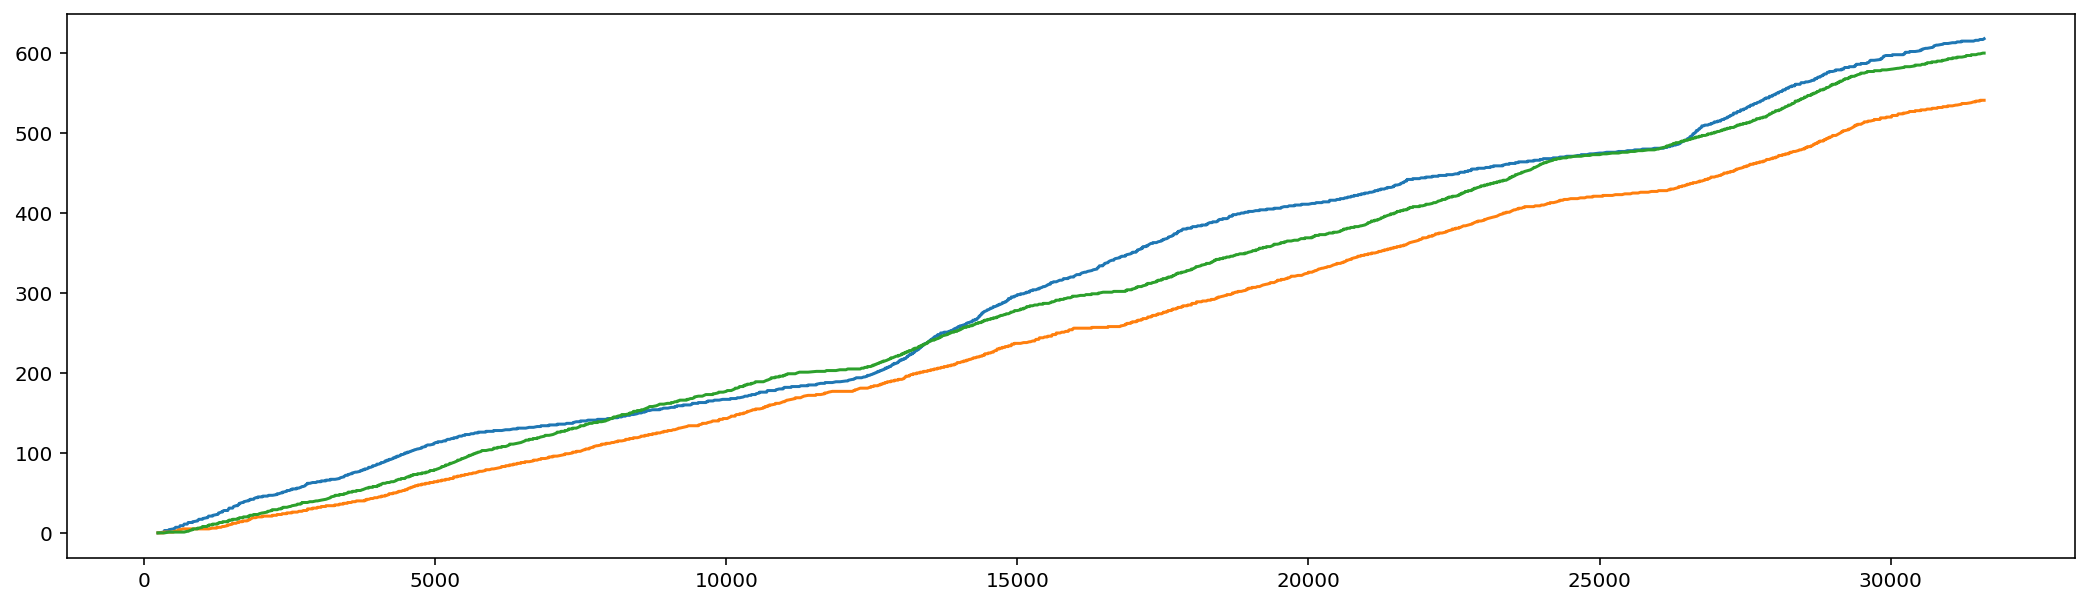

In [9]:
plt.figure(figsize=(18,5))
plt.plot(x,y)


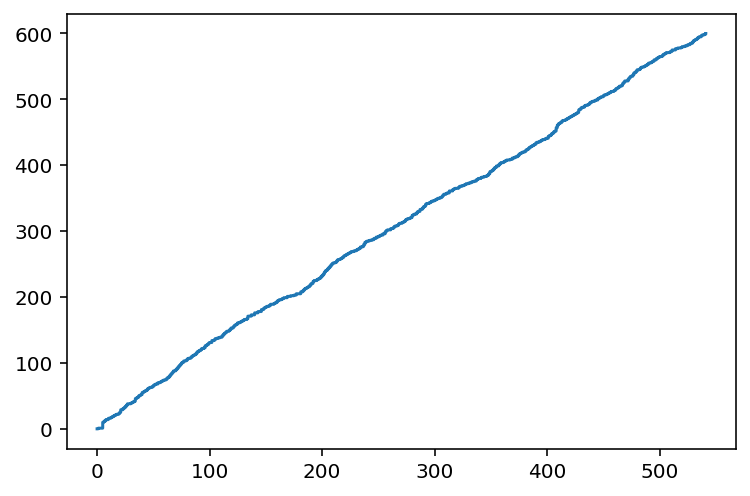

In [10]:
plt.plot(y[:,1],y[:,2])

In [11]:
lens

[619, 542, 601]

In [12]:
y[-1,:]

array([618, 541, 600])

In [ ]:
np.all(np.logical_or(np.diff(y.T)==0,  np.diff(y.T)==1))

In [ ]:
np.all(np.diff(x)>=0)

In [ ]:
plt.plot(x)

In [ ]:
np.diff(values[2])